In [52]:
import numpy as np

R = 6378.14  # km
pi = np.pi
G, M, T = 6.67*10**-11, 5.9722*10**24, 86164.1
g = 9.81  # m/s**2


40075.03553513441

In [85]:
h = 0
equator = 2*pi*(R+h)
equator  # km
speed_equator = equator*1000 / T  # m/s
print(speed_equator)

# orbit altitude en km
h = 1000  # km
orbit = (R + h)*2*pi
orbit  # km
speed_orbit = orbit*1000/T  # m/s
print(speed_orbit)

delta_V = speed_orbit - speed_equator
gravity_equator = G*M/(R*1000)**2
print(gravity_equator)

gravity_orbit = G*M/((R+h)*1000)**2
print(gravity_orbit)

v = 2*pi*R*1000/T  # m/s
v  # m/s
# acceleration centrifuge
a = v**2/(R*1000)
print(a)   # m/s**2

constant = gravity_equator*(R*1000)**2
print(constant)

centrifugal_acceleration = speed_orbit**2/((R+h)*1000)  # m/s**2
print(centrifugal_acceleration)

g_h = constant/((R+h)*1000)**2
print(g_h)

speed_up = (g_h - centrifugal_acceleration)  # m/s
print(speed_up)

speed_keep_altitude = np.sqrt(delta_V**2 + speed_up**2)
print(h,speed_keep_altitude,equator)

def speed_to_keep(h):
    # tangential speed
    orbit = (R + h)*2*pi    # km
    speed_orbit = orbit*1000/T   # m/s
    delta_L = (orbit - equator)*1000   # m
    delta_V = delta_L/T   # m/s
    # radial speed
    g_h = constant/((R+h)*1000)**2
    centrifugal_acceleration = speed_orbit**2/((R+h)*1000)
    speed_up = (g_h - centrifugal_acceleration)  # m/s
    # total speed
    speed_keep_altitude = np.sqrt(delta_V**2 + speed_up**2)
    print(h,delta_V,speed_up,speed_keep_altitude,speed_equator,sep='\t')

for h in range(10000,50000,10000):
    speed_to_keep(h)


10000	729.211505392569	1.397924945526955	729.2128453277891	465.1013071004561
20000	1458.423010785138	0.4322295798173515	1458.4230748345956	465.1013071004561
30000	2187.634516177707	0.10756825495760827	2187.634518822328	465.1013071004561
40000	2916.846021570276	-0.06141867135525031	2916.8460222169083	465.1013071004561


### https://fr.wikipedia.org/wiki/Orbite_g%C3%A9ostationnaire

In [69]:
# T = 86164 s + 98 ms + 903 ns + 697 ps = 86164,098903697 s
G,M,T,R  

(6.67e-11, 5.9722e+24, 86164.1, 6378.14)

In [70]:
def v_geosync(h):  # vitesse obligatoire pour être geosynchrone @ altitude h
    return 2*pi*(R*1000+h)/T  # m/s
    
def altitude():     # altitude geostationnaire
    return (G*M*T**2/(4*pi**2))**(1/3) - R*1000  # en m

def v_sat_h(h):   # vitesse du satellite, h en m
    return np.sqrt(G*M/(R*1000+h))  # m/s

altitude()/1000, v_sat_h(altitude())/1000, v_geosync(altitude())

(35777.04997781945, 3.074004954383551, 3074.0049543835457)

In [71]:
# vitesse surface terre @ equateur
v = v_geosync(0)  # m/s
v, v*T/1000

(465.10130710045604, 40075.035535134404)

In [72]:
for h in range(35770,36000):  # autour de h geostationnaire = 35786 km
    print(h,v_sat_h(h*1000),v_geosync(h*1000),v_geosync(0))
    if v_sat_h(h*1000)<v_geosync(h*1000):break

35770 3074.262032876034 3073.490861889675 465.10130710045604
35771 3074.225563801368 3073.5637830402147 465.10130710045604
35772 3074.1890960245373 3073.6367041907542 465.10130710045604
35773 3074.152629545465 3073.7096253412933 465.10130710045604
35774 3074.116164364074 3073.7825464918324 465.10130710045604
35775 3074.079700480287 3073.855467642372 465.10130710045604
35776 3074.0432378940277 3073.928388792911 465.10130710045604
35777 3074.006776605219 3074.0013099434505 465.10130710045604
35778 3073.9703166137833 3074.0742310939895 465.10130710045604


In [73]:
# sur orbite geostationnaire
h=altitude()
h,v_sat_h(h),v_geosync(h)

(35777049.97781945, 3074.0049543835507, 3074.0049543835457)

In [75]:
altitude()/1000

35777.04997781945

7902.837730981716 465.10130710045604


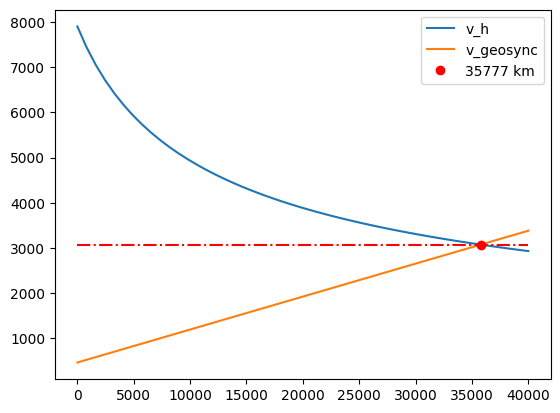

In [82]:
import matplotlib.pyplot as plt
x = np.linspace(0,40000)
y1 = v_sat_h(x*1000)
y2 = v_geosync(x*1000)
plt.plot(x,y1,label='v_h')
plt.plot(x,y2, label='v_geosync')
plt.plot(altitude()/1000,v_sat_h(altitude()),'ro',label=f'{int(altitude()/1000)} km')
plt.plot((0,40000),(v_sat_h(altitude()),v_sat_h(altitude())),'r-.')
plt.legend()
print(v_sat_h(0),v_geosync(0))


In [83]:
# pour ne pas tomber, un satellite doit évoluer très rapidement au raz de la surface terrestre.
print(v_sat_h(0),v_geosync(0))

7902.837730981716 465.10130710045604
